In [1]:
import pandas as pd
from wandb import Api

# Download all W&B run history (all columns)
api = Api()
run = api.run('igor-somite-somite/geneformer-scaling-laws/id3ize6p')
df = pd.DataFrame(list(run.scan_history()))

print(df)

wandb: Currently logged in as: igor-somite (igor-somite-somite) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


     total_parameters  train/learning_rate  eval/steps_per_second  \
0          13480151.0                  NaN                    NaN   
1                 NaN             0.000200                    NaN   
2                 NaN                  NaN                  2.404   
3                 NaN             0.000400                    NaN   
4                 NaN                  NaN                  2.521   
..                ...                  ...                    ...   
171               NaN             0.000948                    NaN   
172               NaN                  NaN                  2.510   
173               NaN             0.000947                    NaN   
174               NaN                  NaN                  4.543   
175               NaN                  NaN                    NaN   

     eval/samples_per_second  _step    _timestamp  train/grad_norm  eval/loss  \
0                        NaN      0  1.764008e+09              NaN        NaN   
1        

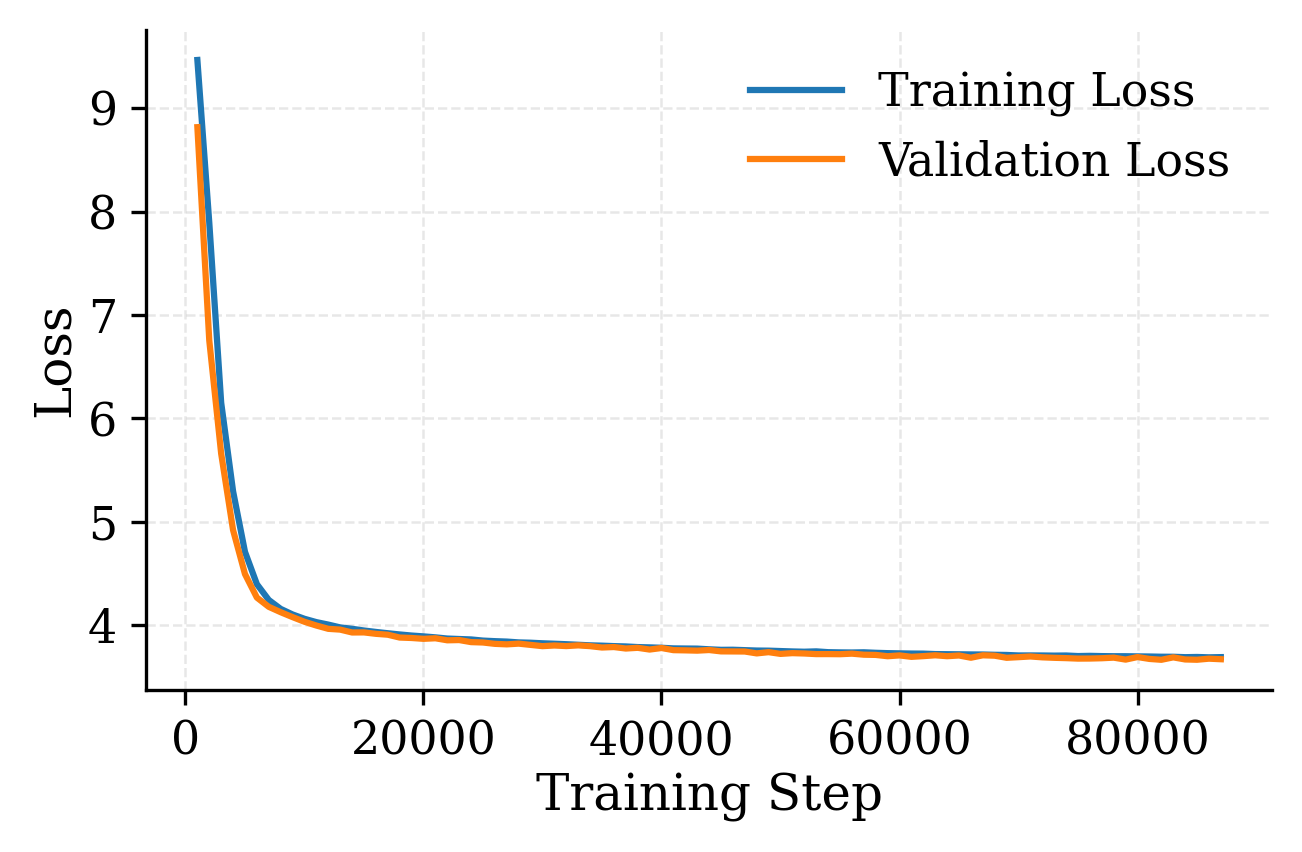

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Use journal-like formatting
mpl.rcParams.update({
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 12,
    "axes.titlesize": 13,
    "axes.linewidth": 0.8,
    "lines.linewidth": 1.5,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "figure.dpi": 300,
    "axes.grid": True,
    "grid.alpha": 0.3,
    "grid.linestyle": "--"
})

fig, ax = plt.subplots(figsize=(4.5, 3.0))

# Prepare curves
train_df = df[['train/global_step', 'train/loss']].dropna()
eval_df = df[['train/global_step', 'eval/loss']].dropna()

ax.plot(train_df['train/global_step'], train_df['train/loss'], label='Training Loss', color='C0')
ax.plot(eval_df['train/global_step'], eval_df['eval/loss'], label='Validation Loss', color='C1')

ax.set_xlabel('Training Step', labelpad=2)
ax.set_ylabel('Loss', labelpad=2)
# ax.set_title('Training and Validation Loss \n(developmental time 10M, quality=1)', fontsize=13, pad=5)
ax.legend(frameon=False, loc='upper right')

# Tidy up borders and grid for publication
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.3)

fig.tight_layout()
plt.show()